<h1><center>
Portfolio Component: Kernel and Ensemble Methods
<h2>Neo Zhao</h2>
<h3>CS 4375 - Introduction to Machine Learning</h3>
</center><h1>

# **1) Read the Auto Data**

In [27]:
import pandas as pd
import seaborn as sb

# 1.a. 
autoData = pd.read_csv('Auto.csv', sep = ',')

# 1.b. 
autoData.head()

# 1.c. 
autoData.shape

(392, 9)

# **2) Data Exploration**

In [28]:
# 2.a.
autoData.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,391.000000,390.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.554220,76.010256,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.750548,3.668093,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.800000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.050000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


### 2.b.
<ul type = "none"> 
  <li>MPG</li>
    <ul>
      <li>Range = 9 to 46.6</li>
      <li>Mean = 23.45</li>
    </ul>
  <li>Cylinders</li>
    <ul>
      <li>Range = 3 to 8</li>
      <li>Mean = 5.47</li>
    </ul>
  <li>Displacement</li>
    <ul>
      <li>Range = 68 to 455</li>
      <li>Mean = 194.41 </li>
    </ul>
  <li>Horsepower</li>
    <ul>
      <li>Range = 46 to 230</li>
      <li>Mean = 104.47</li>
    </ul>
  <li>Weight</li>
    <ul>
      <li>Range = 1613 to 5140</li>
      <li>Mean = 2977.58 </li>
    </ul>
  <li>Acceleration</li>
    <ul>
      <li>Range = 8 to 24.8</li>
      <li>Mean = 15.55 </li>
    </ul>
  <li>Year</li>
    <ul>
      <li>Range = 70 to 82</li>
      <li>Mean = 76.01 </li>
    </ul>
  <li>Origin</li>
    <ul>
      <li>Range = 1 to 3</li>
      <li>Mean = 1.58</li>
    </ul>
</ul>

# **3) Explore Data Types**

In [48]:
# 3.a.
print("Data Types before Modification")
print(autoData.dtypes)

# 3.b.
autoData.cylinders = autoData.cylinders.astype('category').cat.codes

# 3.c.
autoData.origin = autoData.origin.astype('category')

# 3.d.
print("\nData Types after Modification")
print(autoData.dtypes)

Data Types before Modification
cylinders           int8
displacement     float64
horsepower         int64
weight             int64
acceleration     float64
year             float64
origin          category
mpg_high        category
dtype: object

Data Types after Modification
cylinders           int8
displacement     float64
horsepower         int64
weight             int64
acceleration     float64
year             float64
origin          category
mpg_high        category
dtype: object


# **4) Deal with NAs**

In [30]:
# 4.a.
autoData = autoData.dropna()

# 4.b.
autoData.shape

(389, 9)

# **5) Modify Columns**

In [31]:
# 5.a.
avg = autoData['mpg'].mean()
autoDataNew = autoData.loc[autoData.mpg > 1].copy()

autoDataNew.loc[:, 'mpg_high'] = [0 if x < avg else 1 for x in autoDataNew['mpg']]
autoData = autoDataNew 
autoData.mpg_high = autoData.mpg_high.astype('category')

# 5.b.
autoData = autoData.drop (columns = ['mpg', 'name'])

# 5.c.
print(autoData.head())

print(autoDataNew.head())

   cylinders  displacement  horsepower  weight  acceleration  year origin  \
0          4         307.0         130    3504          12.0  70.0      1   
1          4         350.0         165    3693          11.5  70.0      1   
2          4         318.0         150    3436          11.0  70.0      1   
3          4         304.0         150    3433          12.0  70.0      1   
6          4         454.0         220    4354           9.0  70.0      1   

  mpg_high  
0        0  
1        0  
2        0  
3        0  
6        0  
    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          4         307.0         130    3504          12.0  70.0   
1  15.0          4         350.0         165    3693          11.5  70.0   
2  18.0          4         318.0         150    3436          11.0  70.0   
3  16.0          4         304.0         150    3433          12.0  70.0   
6  14.0          4         454.0         220    4354           9.0  70.0   

  

# **6) Data Exploration (Graphs)**

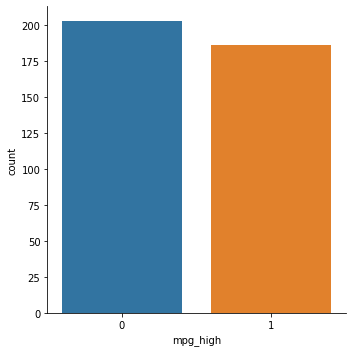

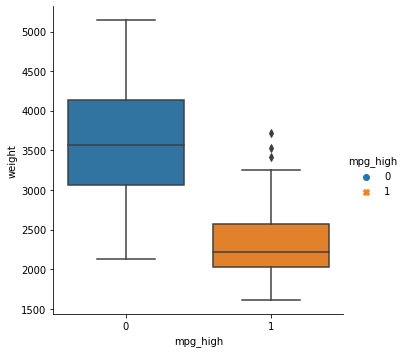

In [32]:
# 6.a.
sb.catplot(x = 'mpg_high', kind = 'count', data = autoData)

# 6.b.
sb.relplot(x = 'horsepower', y = 'weight', data = autoData, hue = autoData.mpg_high, style = autoData.mpg_high)

# 6.c.
sb.boxplot(x = 'mpg_high', y = 'weight', data = autoData)

### 6.d.
<ul type = "none"> 
  <li># 6.a.</li>
    <ul>
      <li>There are more samples of "low_mpg" than "high_mpg"; however, they are almost evenly split</li>
    </ul>
  <li># 6.b.</li>
    <ul>
      <li>A lighter car has less horsepower than any heavier car. Therefore, heavier cars are likely to comsume gas faster than lighter cars.</li>
    </ul>
  <li>#6.c.</li>
    <ul>
      <li>"high_mpg seems to have several outliers while "low_mpg" doesn't have any.</li>
    </ul>
</ul>



# **7) Train/Test Split**

In [33]:
# 7.a. & 7.b. & 7.c. & 7.d.
from sklearn.model_selection import train_test_split 

X = autoData.loc[:, autoData.columns != 'mpg_high'] 
y = autoData.mpg_high

# Split into 80/20 with seed = 1234
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2, random_state = 1234)

print('Train Size:', xTrain.shape) 
print('Test Size:', xTest.shape)


Train Size: (311, 7)
Test Size: (78, 7)


# **8) Logistic Regression**

In [34]:
# 8.a.
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report

clf = LogisticRegression(solver = 'lbfgs', max_iter = 300)
clf.fit(xTrain, yTrain) 
clf.score (xTrain, yTrain)

# 8.b.
pred = clf.predict(xTest)

# 8.c.
# 0 = "low_mpg" 
# 1 = "high_mpg"

print(classification_report(yTest, pred))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        50
           1       0.78      1.00      0.88        28

    accuracy                           0.90        78
   macro avg       0.89      0.92      0.89        78
weighted avg       0.92      0.90      0.90        78



# **9) Decision Trees**

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        50
           1       0.78      1.00      0.88        28

    accuracy                           0.90        78
   macro avg       0.89      0.92      0.89        78
weighted avg       0.92      0.90      0.90        78



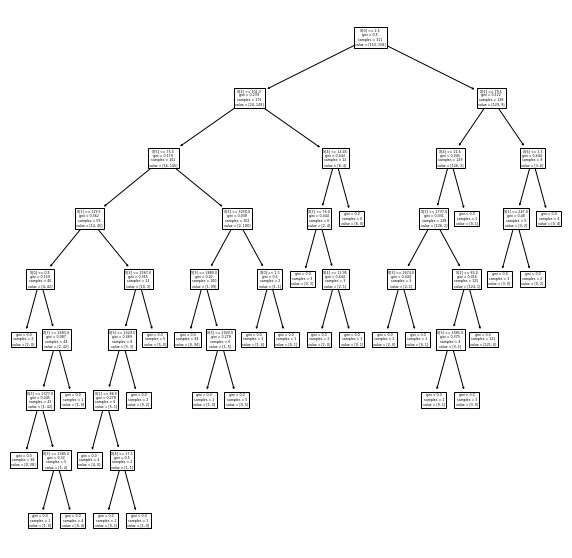

In [35]:
# 9.a.
from sklearn.tree import DecisionTreeClassifier 
from sklearn.datasets import load_iris
from sklearn import tree
from matplotlib import pyplot as plt

clf2 = DecisionTreeClassifier()
clf2.fit(xTrain, yTrain) 
clf2.score(xTrain, yTrain)

# 9.b.
pred2 = clf2.predict(xTest)

# 9.c.
print(classification_report(yTest, pred))

# 9.d.
plt.figure(figsize = (10, 10))
tree.plot_tree(clf2)
plt.show()

# **10) Neural Network**

In [46]:
# 10.a.
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier

scaler = preprocessing.StandardScaler().fit(xTrain)

xTrainScale = scaler.transform(xTrain)
xTestScale = scaler.transform(xTest)

clf3 = MLPClassifier (solver = 'lbfgs', hidden_layer_sizes = (6), max_iter = 1500, random_state = 1234)
clf3.fit(xTrainScale, yTrain) 
clf3.score (xTrainScale, yTrain)

# 10.b.
pred3 = clf3.predict(xTestScale)

print(classification_report(yTest, pred3))

# 10.c.
clf4 = MLPClassifier(solver = 'sgd', hidden_layer_sizes = (3,), max_iter = 1500, random_state = 1234)
clf4.fit(xTrainScale, yTrain) 
clf4.score (xTrainScale, yTrain)

# 10.d.
pred4 = clf4.predict(xTestScale)

print(classification_report(yTest, pred4))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92        50
           1       0.83      0.89      0.86        28

    accuracy                           0.90        78
   macro avg       0.89      0.90      0.89        78
weighted avg       0.90      0.90      0.90        78

              precision    recall  f1-score   support

           0       0.93      0.80      0.86        50
           1       0.71      0.89      0.79        28

    accuracy                           0.83        78
   macro avg       0.82      0.85      0.83        78
weighted avg       0.85      0.83      0.84        78



### 10.e.
*   The first Neural Network performed better by about 7% compared to the second one. I used to same amount of interations for both networks, but the hidden layers are different for each of the networks. Logistic Regression and Decision Tree performed the same, which might mean there's a mistake somewhere. 

# **11) Analysis**

<ul type = "none"> 
  <li># 11.a. Which algorithm performed better?</li>
    <ul>
      <li>I think the Neural Networks performed the best</li>
    </ul>
  <li># 11.b. Compare Accuracy, Recall, and Precision metrics by class </li>
    <ul>
      <li>Logistic Regression</li>
      <ul>
        <li>Accuracy = 90%</li>
        <li>"low_mpg" Recall = 84%</li>
        <li>"high_mpg" Recall = 100%</li>
        <li>"low_mpg" Precision = 100%</li> 
        <li>"high_mpg" Precision = 78%</li>
      </ul>
      <li>Decision Tree</li>
      <ul>
        <li>Accuracy = 90%</li>
        <li>"low_mpg" Recall = 84%</li>
        <li>"high_mpg" Recall = 100%</li>
        <li>"low_mpg" Precision = 100%</li> 
        <li>"high_mpg" Precision = 78%</li>
      </ul>
      <li>Neural Network #1</li>
      <ul>
        <li>Accuracy = 90%</li>
        <li>"low_mpg" Recall = 90%</li>
        <li>"high_mpg" Recall = 89%</li>
        <li>"low_mpg" Precision = 94%</li> 
        <li>"high_mpg" Precision = 83%</li>
      </ul>
      <li>Neural Network #2</li>
      <ul>
        <li>Accuracy = 83%</li>
        <li>"low_mpg" Recall = 80%</li>
        <li>"high_mpg" Recall = 89%</li>
        <li>"low_mpg" Precision = 93%</li> 
        <li>"high_mpg" Precision = 71%</li>
      </ul>
    </ul>
  <li>#11.c. Give your analysis of why the better-performing algorithm might have outperformed
the other</li>
    <ul>
      <li>I believe Neural Networks perform more efficiently when working with complex data, allowing the model to outperform Logistic Regression as well as Decision Trees.</li>
    </ul>
  <li>#11.d. Write a couple of sentences comparing your experiences using R versus sklearn. Feel free to express strong preferences.</li>
      <ul>
        <li>I definitely prefer R at this point, since I have worked with it more in the past and I am more comfortable with this language; however, after this assignment, I am ready to dive deeper into learning Machine Learning with Python as it is always useful to know more.</li>
      </ul>
</ul>

